## Finding Heavy Traffic Indicators of on I-94 Interstate Highway

The goal of this analysis is to determine a potentials indicators of heavy traffic on I-94 Interstate highway. These indicators can be weather, time of the day, time of the week, etc. 

The dataset for this project is from 2012 - 2018, which was made available by John Hogue, and it be can downloaded from the [UCI Machine Learning Repository](''https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume'')

## Summary 
- The results of the analysis revealed that the major indicaotrs of heavy traffic in I-94 Interstate highway between 2012 and 2018 were during business days in datetime. <br>
- The traffic volume occasionally exceed 6000 cars during daytime on business days during rush hours. These rush hours are 6am-7am and 3pm-4pm.<br>
- Traffic is intense during warm months (March–October) and less heavy during cold months (November–February).<br>
- Temperature does not have strong correlation with traffic volume.

#### Data Dictionary:  
The dataset have `9` columns
- `holiday:` This is a categorical data that refer to US National holidays plus regional holiday, Minnesota State Fair<br>
- `temp:` This is a numerical data that refer to average temp in kelvin<br>
- `rain_1h:` A numerical data whihc is the amount in mm of rain that occurred in the hour<br>
- `snow_1h:` A numerical data which is the amount in mm of snow that occurred in the hour<br>
- `clouds_all:` This is also a numerica whihc is the percentage of cloud cover<br>
- `weather_main:` A categorical short textual data that describe the current weather<br>
- `weather_description:` A categorical long textual data that describe the current weather<br>
- `date_time:` DateTime Hour of the data collected in local CST time<br>
- `traffic_volume:` Numeric Hourly I-94 ATR 301 reported westbound traffic volume


In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()

# Reading the dataset
i_94_traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [2]:
# View the first 5 records
i_94_traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# View the last 5 records
i_94_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset have `48204` with `9` columns.  Each row describes traffic and weather data for a specific hour. We have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

In [5]:
#  Checking for for null values in any of the columns
i_94_traffic.isnull().any()

holiday                False
temp                   False
rain_1h                False
snow_1h                False
clouds_all             False
weather_main           False
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

Non of the column have a null value

# Finding Heavy Traffic Indicators During  Daytime

### Analyzing Traffic Volume
We're going to start our analysis by examining the distribution of the traffic_volume column.

Text(0.5, 0, 'Traffic volume')

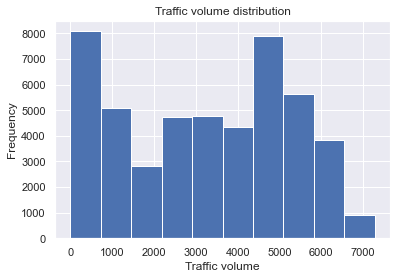

In [6]:
# Plot an histogram chat to view the traffic volume distribution
i_94_traffic['traffic_volume'].plot.hist()
plt.title('Traffic volume distribution')
plt.xlabel('Traffic volume')

In [7]:
# Check the distribution of the traffic_volume column
i_94_traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

It can be observed that about `25%` of the time, there were `1193` cars or fewer passing the station each hour, this probably occurs during the night, or when a road is under construction.

### Traffic Volume: Day vs. Night
We'll start by dividing the dataset into two parts:

- `Daytime data:` hours from 7 AM to 7 PM (12 hours)
- `Nighttime data:` hours from 7 PM to 7 AM (12 hours)

Of course, this may not be a perfect criterion for distinguishing between nighttime and daytime, but at least, it's a good starting point.

In [8]:
# Convert date_time column to datetime by using `pd.to_datetime()` function
i_94_traffic['date_time'] = pd.to_datetime(i_94_traffic['date_time'])

day = i_94_traffic.copy()[(i_94_traffic['date_time'].dt.hour >= 7) & (i_94_traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94_traffic.copy()[(i_94_traffic['date_time'].dt.hour >= 19) | (i_94_traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


There is a notable difference in row numbers between day and night is due to a few hours of missing data. 
If we check rows 176 and 177, we'll notice there's no data for about two hours as shown below.

In [9]:
i_94_traffic[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


### Traffic Volume: Day vs. Night Cont..
Now that the day and night has been isolated, we're going to generate the histograms of traffic volume side-by-side by using a grid chart.

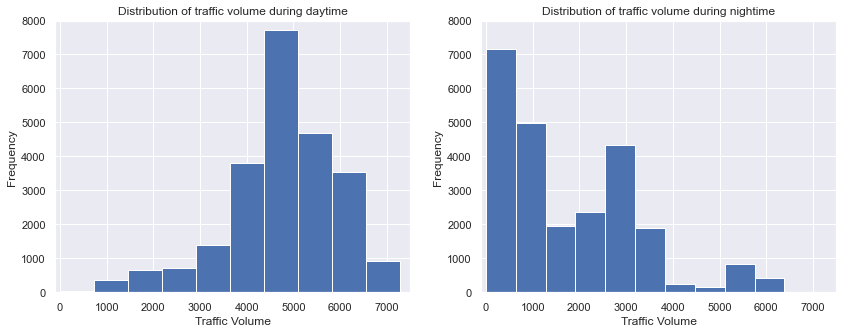

In [10]:
plt.figure(figsize=(14,5))

# Histogram  for day trffic
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Distribution of traffic volume during daytime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

# Histogram  for night traffic
plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Distribution of traffic volume during nightime')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Use Series.describe() to look up a few statistics for traffic_volume during the day
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
# Use Series.describe() to look up a few statistics for traffic_volume during the night
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

It could be observed that the distribution of traffic volume during the day is left skewed. This implies that most of the traffic volume values are high. Also, in 75% of the time, there are at least 4,252 cars passing the station each hour and only 25% of values are 4,252 or less).

On the other side, the histogram displaying the nighttime data is right skewed. This shows that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was only 2,819 or less.

Therefore, the traffic at night is generally light. Since our goal is to find indicators of heavy traffic, going forward, we'll only focus on the daytime data for the analysis.

### Time Indicators
Time is one of the possible indicators for heavy traffic. Whihc could be as a result of more people on the road in a particular month, on a particular day, or at a particular time of the day.

We're going to look at a few line plots showing how the traffic volume changes according to the following parameters:

- Month
- Day of the week
- Time of day

### Traffic Volume Vs. Month

In [13]:
# Average monthly traffic volume
day['month'] = day['date_time'].dt.month
traffic_by_month = day.groupby('month').mean()
traffic_by_month['traffic_volume']


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

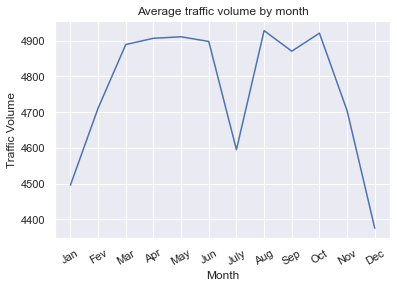

In [14]:
# The month as Jan=1, Dec=12
# Creating line plot to visualize the average traffic volume by month
traffic_by_month['traffic_volume'].plot.line()
plt.title('Average traffic volume by month')
plt.xticks(rotation=30, ticks=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,], labels=["Jan",  "Fev",  "Mar",  "Apr",  "May",  "Jun",  "July",  "Aug",  "Sep","Oct", "Nov", "Dec"] )
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

The above grahp shows that the traffic is less heavy during cold months (November–February) and more intense during warm months (March–October), with an exception of July. 
The July exception could raise question such as; is there anything special in the month of July? does each year experience significantly less traffic in July?

Perhaps, the minimum values of traffic volume could be explained because the holiday (in Dec and Jan we have winter/xmas holiday and in July probably we have students summer holiday, and workers also in summer holiday), all these maybe responsible  for the low traffic volume in those months.


In order to answer some of these questions, it is important to see how the traffic volume changed each year in July.

### Traffic Volume Vs. Year

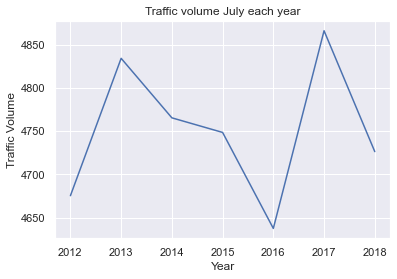

In [15]:
# Generate a line plot to visualize how the traffic volume changed in July each year.
day['year'] = day['date_time'].dt.year
traffic_by_year_july = day[day['month']==7]
traffic_by_year_july = day.groupby('year').mean()
traffic_by_year_july['traffic_volume'].plot.line()
plt.title('Traffic volume July each year')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

Obviously, the month of July also experience heavy traffic, just like the other warm months. However, there is an exception in 2016, which had a high decrease in traffic volume. 
[This 2016 article]('https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696') suggest possible reason for this which is road construction

Tentatively, we can say that warm months usually experience heavier traffic compared to cold months. In a warm month, you can can expecta traffic volume of almost 5,000 cars for each hours of dayay time.

### Traffic Volume Vs. Day of The Week

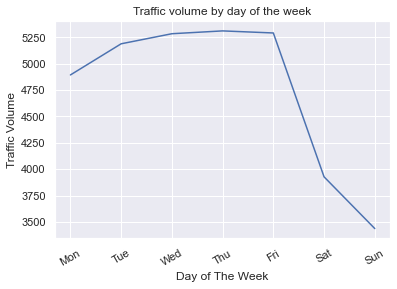

In [16]:
# The day of the week with Mon=0, Sun=6
# Generate a line plot to visualize how the traffic volume changed in day of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
traffic_by_dayofweek = day.groupby('dayofweek').mean()['traffic_volume'].plot.line()
plt.title('Traffic volume by day of the week')
plt.xticks(rotation=30, ticks=[0, 1,  2,  3,  4,  5,  6], labels=["Mon",  "Tue",  "Wed",  "Thu",  "Fri",  "Sat",  "Sun"] )
plt.xlabel('Day of The Week')
plt.ylabel('Traffic Volume')
plt.show()


As depicted in the grapgh, there is usually heavy traffic volume during the business days (Monday - Friday). With the exception of Monday, We observed traffic vlume to be over 5,000 cars during the business days. The grpah also shows that weekend experience lighter traffic volume, which is below 4,000 cars

### Traffic Volume Vs. Daytime (Business  Days Vs. Weekends)
Let us further exploring the data to see what values we have based on time of the day. The weekends, however, will drag down the average values, so we're going to look only at the averages separately.

In [17]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] 
weekend = day.copy()[day['dayofweek'] >= 5] 
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


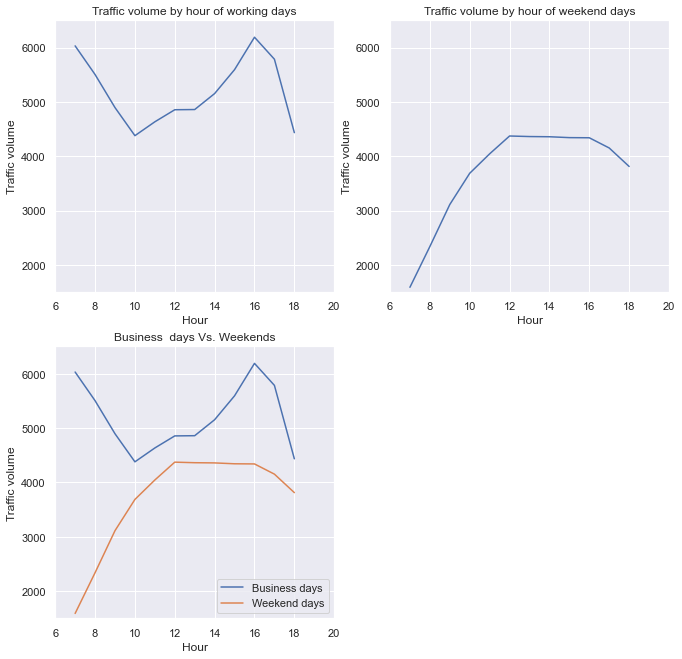

In [18]:
plt.figure(figsize=(11,11))
# Generate a line plot to visualize how the traffic volume changed hourly on business days
plt.subplot(2, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume by hour of working days')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

# Generate a line plot to visualize how the traffic volume changed hoursly on weekends 
plt.subplot(2, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume by hour of weekend days')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

# Combine the 2 line plot for better comparison
plt.subplot(2, 2, 3)
plt.xlim(6,20)
plt.ylim(1500,6500)
businessday_weekend = by_hour_business['traffic_volume'].plot.line(),
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Business  days Vs. Weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic volume')

plt.legend(["Business days", "Weekend days"], loc ="lower right")
# plt.legend()
plt.show()

On the business days, the traffic volume is generally higher almost at every hour compared to the weekends. 
Obviously, 7am and 4pm happens to be the rush hours, and this is when most people are on transit from home to work and back. The rush hours recorded volumes of over 6,000 cars.


### Weather Indicators
From the dataset, we have another possible indicator of heavy traffic which is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

To start with, let's begin by looking up their correlation values with `traffic_volume`.

In [19]:
#  Check the correlation  between traffic volume and the numerical weather columns.
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature `temp` have the strongest correlation with a value of `+0.13`. The other relevant columns (`rain_1h`, `snow_1h` and `clouds_all`) don't show any strong correlation with traffic_value.

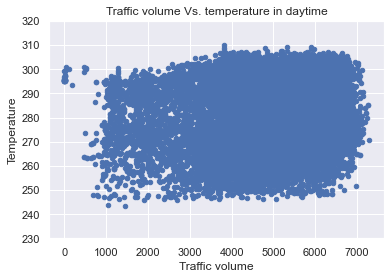

In [20]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)
plt.title("Traffic volume Vs. temperature in daytime")
plt.xlabel('Traffic volume')
plt.ylabel('Temperature')
plt.show()

It can be depict from the above scater plot that temperature doesn't appear to be a solid indicator of heavy traffic.

Hence, the need to look at the other weather-related columns: `weather_main` and `weather_description`

### Considering Weather Types
We start by to grouping the data by `weather_main` and examine the traffic_volume averages.

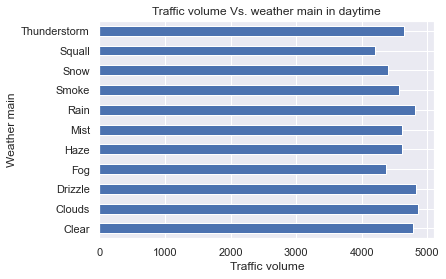

In [21]:
# Visualise traffic volume by weather_main
traffic_by_weather_main = day.groupby('weather_main').mean()
traffic_by_weather_main['traffic_volume'].plot.barh()
plt.title("Traffic volume Vs. weather main in daytime")
plt.xlabel('Traffic volume')
plt.ylabel('Weather main')
plt.show()

Non of the weather type have traffic volume above 5,000 cars.  This can make identifying finding a heavy traffic indicator more complex. 

However, we can further exploring the data  using the `weather_description`, which has a more detailweather classification.

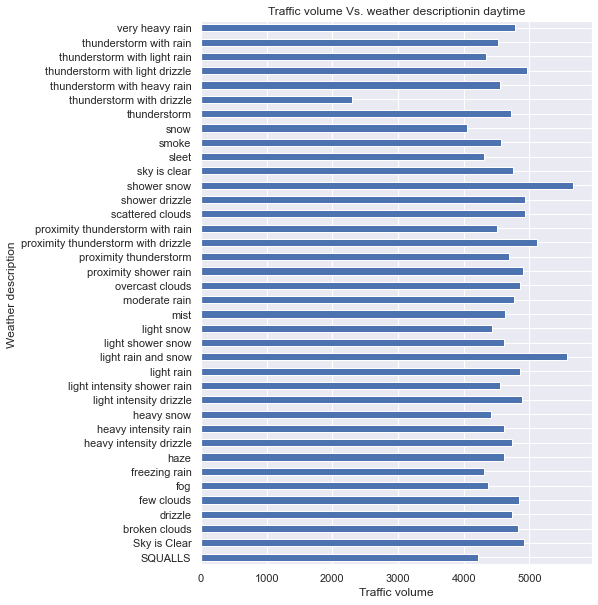

In [22]:
# Visualise traffic volume by weather_description
traffic_by_weather_description = day.groupby('weather_description').mean()
traffic_by_weather_description['traffic_volume'].plot.barh(figsize=(7,10))
plt.title("Traffic volume Vs. weather descriptionin daytime")
plt.xlabel('Traffic volume')
plt.ylabel('Weather description ')
plt.show()

Majorly, there are two weather types where traffic volume exceeds 5,000 cars, and they are:
- Shower snow 
- Light rain and snow
- Proximity thunderstorm with drizzle

The three ewather types are indicators of bad weather, perhaps more  people need to use car to move around instead  of walking, riding or using bike.


# Finding Heavy Traffic Indicators During  Nighttime

In [23]:
# Average monthly traffic volume in nighttime
night['month'] = night['date_time'].dt.month
traffic_by_month_night = night.groupby('month').mean()
traffic_by_month_night['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

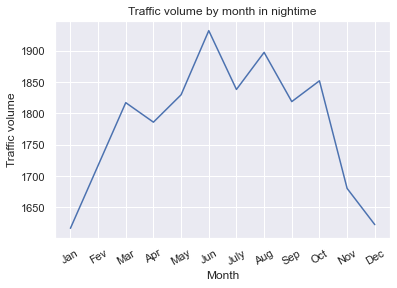

In [24]:
# The month as Jan=1, Dec=12
# Creating line plot to visualize the average traffic volume by month during the nighttime

traffic_by_month_night['traffic_volume'].plot.line()
plt.title('Traffic volume by month in nightime')
plt.xticks(rotation=30, ticks=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,], labels=["Jan",  "Fev",  "Mar",  "Apr",  "May",  "Jun",  "July",  "Aug",  "Sep","Oct", "Nov", "Dec"] )
plt.xlabel('Month')
plt.ylabel('Traffic volume')
plt.show()

There wre more traffic in the month of June and August with an average of over 1800 traffic volme of cars. This could be as a result of the summer period when the days are longer with daylight after 7PM and people are tend to still be on the road during this hour.


### Traffic Volume Vs. Day of Week

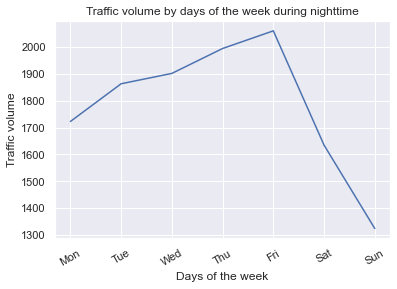

In [25]:
# Day of the week with Monday=0, Sunday=6
# Creating a line plot to visualize the average traffic volume by day of the week:

night['weekday'] = night['date_time'].dt.dayofweek
by_dayofweek = night.groupby('weekday').mean()['traffic_volume'].plot.line()
plt.title('Traffic volume by days of the week during nighttime')
plt.xticks(rotation=30, ticks=[0, 1, 2, 3, 4, 5, 6,], labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Days of the week")
plt.ylabel("Traffic volume")
plt.show()




There is an indicator of more traffic on Fiday night with over 2000 traffic volume, perhaps maybe because people prefer social and relaxation activities during the weekeds starting from Friday evening. Sunday night have a less traffic with less than 1500 traffic volume.

### Traffic Volume Vs. Nighttime (Working Days Vs. Weekends)

In [26]:
night['hour'] = night['date_time'].dt.hour
business_day_night = night.copy()[night['weekday'] <= 4]
weekend_night = night.copy()[night['weekday'] >= 5]

business_day_night = business_day_night.groupby('hour').mean()
weekend_night = weekend_night.groupby('hour').mean()
print(business_day_night['traffic_volume'])
print(weekend_night['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


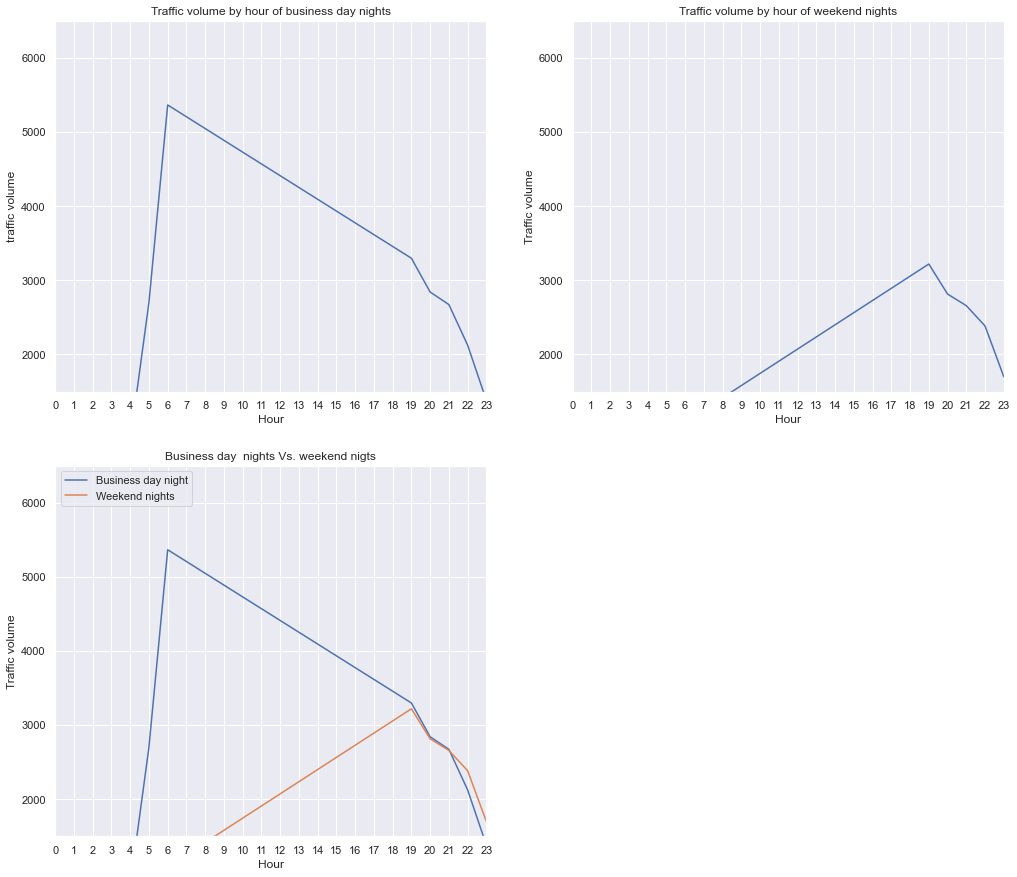

In [27]:
plt.figure(figsize=(17,15))
# Creat a line plot to visualize how the traffic volume changed hourly on business day nights
plt.subplot(2, 2, 1)
business_day_night['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume by hour of business day nights')
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.ylabel('traffic volume')


# Generate a line plot to visualize how the traffic volume changed hoursly on weekend nights 
plt.subplot(2, 2, 2)
weekend_night['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic volume by hour of weekend nights')
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.ylabel('Traffic volume')

# Combine the 2 line plots for better comparison
plt.subplot(2, 2, 3)
plt.xlim(6,20)
plt.ylim(1500,6500)
businessday_weekend_night = business_day_night['traffic_volume'].plot.line(),
weekend_night['traffic_volume'].plot.line()
plt.title('Business day  nights Vs. weekend nigts')

plt.legend(["Business day night", "Weekend nights"], loc ="upper left")
plt.xlabel('Hour')
plt.xticks(range(0,24))
plt.ylabel('Traffic volume')
plt.show()


From the graphs above, it appears that business day experience more traffic volume of above 5000 cars between 6am - 7am. On weekends, the rush hours is 6pm and 7pm with traffic volume of over 3000 cars. Also, at 7pm, both the business day and weekends have the same rush hour with traffic volume of over 3000 cars.



### Traffic Volume Vs. Weather During Nighttime:

In [28]:
night.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
month             0.001342
weekday          -0.073636
hour              0.454586
Name: traffic_volume, dtype: float64

Again, just as we have it in the daytime, among all the weather factors, temperature `temp` have the highest correlation value `(+0.09)` with traffic volume

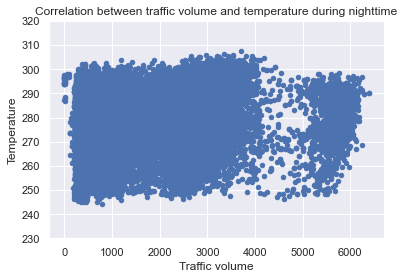

In [29]:
night.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)
plt.title("Correlation between traffic volume and temperature during nighttime")
plt.xlabel('Traffic volume')
plt.ylabel('Temperature')
plt.show()

It appears there is no strong correlation between temperature and traffic volume

### Considering Weather Types
- Weather main
- Weather escription
We start by to grouping the data by `weather_main` and examine the traffic_volume averages.

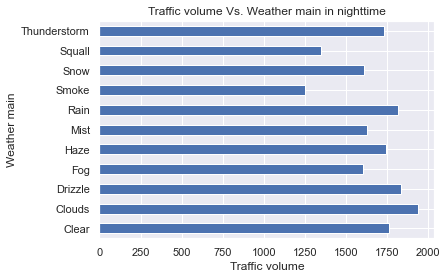

In [30]:
# Visualise traffic volume by weather main
weather_main_night = night.groupby('weather_main').mean()['traffic_volume'].plot.barh()
plt.xlabel('Traffic volume')
plt.title('Traffic volume Vs. Weather main in nighttime')
plt.ylabel('Weather main')
plt.show()


Non of these weather factors seems to have significant impact on traffic volume at night, as the one with highest traffic volume is `Cloud` with less than `2000` cars.

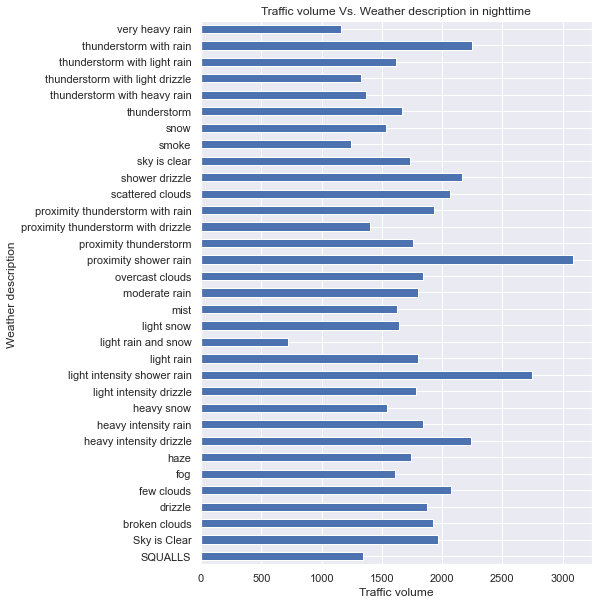

In [31]:
# Visualise traffic volume by weather description 
weather_desc_night = night.groupby('weather_description').mean()['traffic_volume'].plot.barh(figsize=(7,10))
plt.xlabel('Traffic volume')
plt.title('Traffic volume Vs. Weather description in nighttime')
plt.ylabel('Weather description ')
plt.show()

From the graph above, only `Proximity shower rain` and `Light intensity shower rain` are potential indcators of heavy traffic in the nighttime, with each of them having `2550` and `3000+` traffic volume.


## Conclusion
The objective of this project is to find possible indicators of heavy traffic on the I-94 interstate highway. The results of the analysis shows that daytime indicators are more significant than nighttime and weather indicators. The analysis revealed the following as some of the major indicators for heavy traffic.
- Traffic is usually  heavier during the warm months (March -  October) and less heavy in the cold months (November - February)
-  Generall, the traffic volume is usually higher during the working days, compare to weekends. The rush hours for heavy traffic are 6am-7am and 3pm-4pm on daytime with records of over 6000 cars.
- Shower snow, light rain and snow and proximity thunderstorm with drizzle also affect traffic volume in dayattime with  with over 5000 traffic volume
- Proximity shower rain and light intensity shower rain have little effect on traffic volume in nightime with about 3000 cars compare to other weather factors in the nighttime
- No strong correlation between temperature and traffic volume as the correlation value is less thean 1.
